# Auto-Encoders and Decoders

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Reshape
from keras.datasets import mnist
import matplotlib.pyplot as plt

2024-11-29 13:34:50.791612: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-29 13:34:50.806693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732905290.822618    2324 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732905290.827232    2324 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-29 13:34:50.846186: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### No need of labels, so didn't stored the `y_train` and `y_test`.

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Normalize and Reshape.
input_train = x_train.reshape(x_train.shape[0], -1) / 255
input_test = x_test.reshape(x_test.shape[0], -1) / 255

In [5]:
input_train.shape, input_test.shape

((60000, 784), (10000, 784))

In [6]:
input_dimension = input_train.shape[1]
input_dimension

784

In [7]:
# Basic Model.
def build_autoencoder(latent_features):
    model = Sequential()

    # Encoder.
    model.add(Dense(256, activation = 'relu', input_shape = (input_dimension,)))
    model.add(Dense(64, activation = 'relu'))

    # Code.
    model.add(Dense(latent_features, activation='relu'))

    # Decoder.
    model.add(Dense(64, activation='relu'))
    model.add(Dense(256, activation='relu'))

    # Output.
    model.add(Dense(input_dimension, activation='sigmoid'))

    # Compile.
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

In [8]:
latent_features = 8
epochs = 20
batch_size = 120

autoencoder = build_autoencoder(latent_features)
autoencoder.summary()

/home/rachit/GitHub/Neural-Networks-and-Deep-Learning---Lab/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732905294.198757    2324 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,632 (1.67 MB)

 Trainable params: 436,632 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = autoencoder.fit(input_train,
                          input_train,
                          epochs = epochs,
                          batch_size = batch_size,
                          validation_split=0.2,
                          verbose=True)

Epoch 1/20


I0000 00:00:1732905297.329919    2501 service.cc:148] XLA service 0x7fc8ac004750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732905297.329986    2501 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-11-29 13:34:57.369726: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732905297.570892    2501 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-29 13:34:59.753383: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_281', 168 bytes spill stores, 168 bytes spill loads

2024-11-29 13:35:00.344489: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_288

 84/400 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4254

I0000 00:00:1732905305.230926    2501 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.2883 - val_loss: 0.1629
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1571 - val_loss: 0.1438
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1417 - val_loss: 0.1384
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1363 - val_loss: 0.1350
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1336 - val_loss: 0.1334
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1311 - val_loss: 0.1316
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1299 - val_loss: 0.1299
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1286 - val_loss: 0.1293
Epoch 9/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1271 - val_loss: 0.1281
Epoch 10/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1258 - val_loss: 0.1273
Epoch 11/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1251 - val_loss: 0.1262
Epoch 12/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0

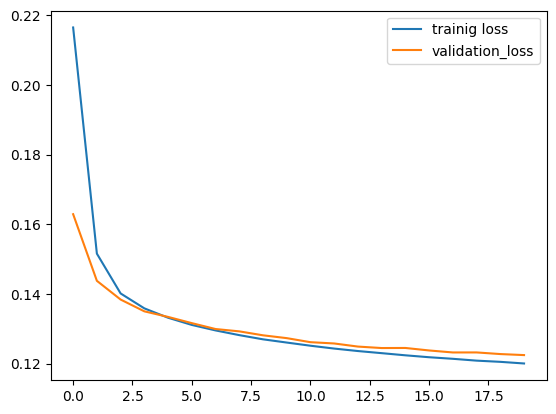

In [10]:
plt.plot(history.history['loss'], label = 'trainig loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

In [ ]:
decoded_imgs = autoencoder.predict(input_test)

n = 10
plt.figure(25.6, 16)

for i in range(n):

    # Display original.
    ax = plt.subplot(2, n, i+1)

    plt.imshow(x_test[i])
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

283/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2024-11-29 13:37:12.276480: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_50', 8 bytes spill stores, 8 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


TypeError: Value after * must be an iterable, not int